# 1) Preparación previa

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Lectura del dataset

Se decidió utilizar unos datos de votos legislativos en EEUU, que describe si se votó afirmativamente, negativamente o absteniéndose en 16 leyes.

In [2]:
df_votes = pd.read_csv('house-votes-84.csv')

### Vista general

Se corren varias funciones para obtener un resumen general del dataset

In [3]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Class Name                               435 non-null    object
 1    handicapped-infants                     435 non-null    object
 2    water-project-cost-sharing              435 non-null    object
 3    adoption-of-the-budget-resolution       435 non-null    object
 4    physician-fee-freeze                    435 non-null    object
 5    el-salvador-aid                         435 non-null    object
 6    religious-groups-in-schools             435 non-null    object
 7    anti-satellite-test-ban                 435 non-null    object
 8    aid-to-nicaraguan-contras               435 non-null    object
 9    mx-missile                              435 non-null    object
 10   immigration                             435 non-null    objec

In [4]:
df_votes.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


# 2) Análisis exploratorio

Se comienza con el análisis general: ¿cómo se distribuye la variable target? ¿están balanceados los datos?

In [5]:
balance = pd.concat([df_votes['Class Name'].value_counts(), df_votes['Class Name'].value_counts(normalize=True).round(2)], axis = 1)
balance.columns = ['Votos', 'Proporción']
balance

,Votos,Proporción
democrat,267,0.61
republican,168,0.39


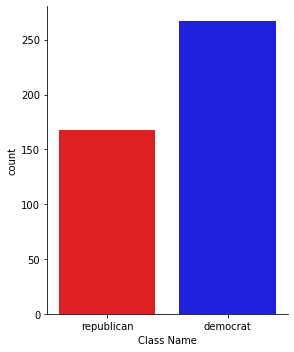

In [6]:
# Se crea una paleta con los típicos colores partidarios, ya que será usada a futuro
color_partidos = ['red', 'blue']

g = sns.catplot(x='Class Name', 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=5, aspect=.8);

Hay un importante desbalance considerando que casi 2 tercios de los legisladores son demócratas y 1 tercio republicano. Este dato es importante a la hora de contrastar votos. A continuación se procederá con el análisis más específico, ley por ley. Para ello, se crea una nueva columna con el nombre Target ya que es necesaria para realizar análisis con una variable numérica

In [7]:
df_votes['Target'] = np.where(df_votes['Class Name'] == 'democrat', 1, 0)

## Ley N° 1: Handicapped-Infants

#### Totales entre ambos partidos según voto realizado

In [8]:
df_votes[' handicapped-infants'].value_counts()

n    236
y    187
?     12
Name:  handicapped-infants, dtype: int64

#### Porcentaje de votos según partido

In [9]:
handicapped = pd.concat([100*(df_votes.groupby(' handicapped-infants')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' handicapped-infants')['Target'].mean().round(2)))], axis = 1)
handicapped.columns = ["Democrat", "Republican"]
handicapped

,Democrat,Republican
handicapped-infants,,
?,75.0,25.0
n,43.0,57.0
y,83.0,17.0


#### Gráfico

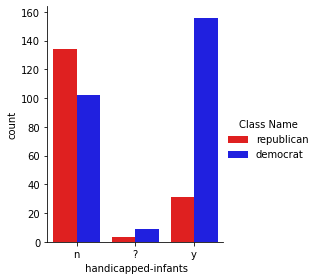

In [10]:
g = sns.catplot(x=' handicapped-infants', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 2: water-project-cost-sharing

#### Totales entre ambos partidos según voto realizado

In [11]:
df_votes[' water-project-cost-sharing'].value_counts()

y    195
n    192
?     48
Name:  water-project-cost-sharing, dtype: int64

#### Porcentaje de votos según partido

In [12]:
water = pd.concat([100*(df_votes.groupby(' water-project-cost-sharing')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' water-project-cost-sharing')['Target'].mean().round(2)))], axis = 1)
water.columns = ["Democrat", "Republican"]
water

,Democrat,Republican
water-project-cost-sharing,,
?,58.0,42.0
n,62.0,38.0
y,62.0,38.0


#### Gráfico

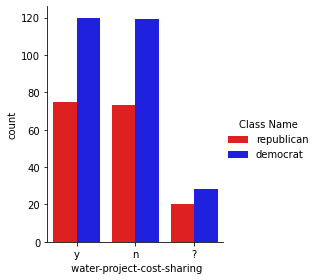

In [13]:
g = sns.catplot(x=' water-project-cost-sharing', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 3: adoption-of-the-budget-resolution

#### Totales entre ambos partidos según voto realizado

In [14]:
df_votes[' adoption-of-the-budget-resolution'].value_counts()

y    253
n    171
?     11
Name:  adoption-of-the-budget-resolution, dtype: int64

#### Porcentaje de votos según partido

In [15]:
adoption = pd.concat([100*(df_votes.groupby(' adoption-of-the-budget-resolution')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' adoption-of-the-budget-resolution')['Target'].mean().round(2)))], axis = 1)
adoption.columns = ["Democrat", "Republican"]
adoption

,Democrat,Republican
adoption-of-the-budget-resolution,,
?,64.0,36.0
n,17.0,83.0
y,91.0,9.0


#### Gráfico

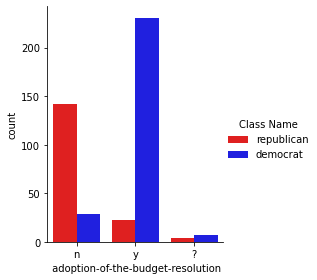

In [16]:
g = sns.catplot(x=' adoption-of-the-budget-resolution', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 4: physician-fee-freeze

#### Totales entre ambos partidos según voto realizado

In [17]:
df_votes[' physician-fee-freeze'].value_counts()

n    247
y    177
?     11
Name:  physician-fee-freeze, dtype: int64

#### Porcentaje de votos según partido

In [18]:
physician = pd.concat([100*(df_votes.groupby(' physician-fee-freeze')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' physician-fee-freeze')['Target'].mean().round(2)))], axis = 1)
physician.columns = ["Democrat", "Republican"]
physician

,Democrat,Republican
physician-fee-freeze,,
?,73.0,27.0
n,99.0,1.0
y,8.0,92.0


#### Gráfico

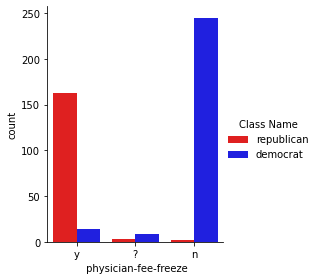

In [19]:
g = sns.catplot(x=' physician-fee-freeze', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 5: el-salvador-aid

#### Totales entre ambos partidos según voto realizado

In [20]:
df_votes[' el-salvador-aid'].value_counts()

y    212
n    208
?     15
Name:  el-salvador-aid, dtype: int64

#### Porcentaje de votos según partido

In [21]:
salvador = pd.concat([100*(df_votes.groupby(' el-salvador-aid')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' el-salvador-aid')['Target'].mean().round(2)))], axis = 1)
salvador.columns = ["Democrat", "Republican"]
salvador

,Democrat,Republican
el-salvador-aid,,
?,80.0,20.0
n,96.0,4.0
y,26.0,74.0


#### Gráfico

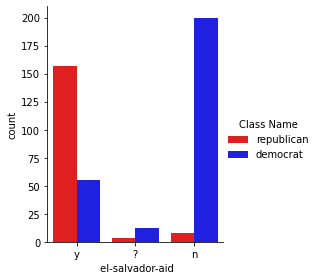

In [22]:
g = sns.catplot(x=' el-salvador-aid', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 6: religious-groups-in-schools

#### Totales entre ambos partidos según voto realizado

In [23]:
df_votes[' religious-groups-in-schools'].value_counts()

y    272
n    152
?     11
Name:  religious-groups-in-schools, dtype: int64

#### Porcentaje de votos según partido

In [24]:
religious = pd.concat([100*(df_votes.groupby(' religious-groups-in-schools')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' religious-groups-in-schools')['Target'].mean().round(2)))], axis = 1)
religious.columns = ["Democrat", "Republican"]
religious

,Democrat,Republican
religious-groups-in-schools,,
?,82.0,18.0
n,89.0,11.0
y,45.0,55.0


#### Gráfico

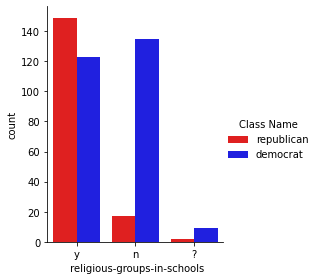

In [25]:
g = sns.catplot(x=' religious-groups-in-schools', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 7: anti-satellite-test-ban

#### Totales entre ambos partidos según voto realizado

In [26]:
df_votes[' anti-satellite-test-ban'].value_counts()

y    239
n    182
?     14
Name:  anti-satellite-test-ban, dtype: int64

#### Porcentaje de votos según partido

In [27]:
satellite = pd.concat([100*(df_votes.groupby(' anti-satellite-test-ban')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' anti-satellite-test-ban')['Target'].mean().round(2)))], axis = 1)
satellite.columns = ["Democrat", "Republican"]
satellite

,Democrat,Republican
anti-satellite-test-ban,,
?,57.0,43.0
n,32.0,68.0
y,84.0,16.0


#### Gráfico

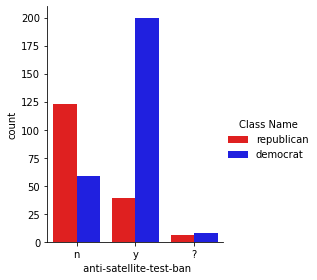

In [28]:
g = sns.catplot(x=' anti-satellite-test-ban', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 8: aid-to-nicaraguan-contras

#### Totales entre ambos partidos según voto realizado

In [29]:
df_votes[' aid-to-nicaraguan-contras'].value_counts()

y    242
n    178
?     15
Name:  aid-to-nicaraguan-contras, dtype: int64

#### Porcentaje de votos según partido

In [30]:
nicaragua = pd.concat([100*(df_votes.groupby(' aid-to-nicaraguan-contras')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' aid-to-nicaraguan-contras')['Target'].mean().round(2)))], axis = 1)
nicaragua.columns = ["Democrat", "Republican"]
nicaragua

,Democrat,Republican
aid-to-nicaraguan-contras,,
?,27.0,73.0
n,25.0,75.0
y,90.0,10.0


#### Gráfico

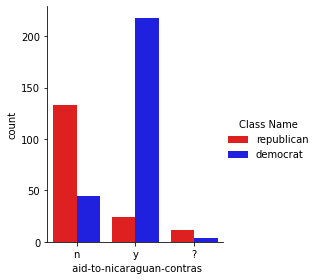

In [31]:
g = sns.catplot(x=' aid-to-nicaraguan-contras', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 9: mx-missile

#### Totales entre ambos partidos según voto realizado

In [32]:
df_votes[' mx-missile'].value_counts()

y    207
n    206
?     22
Name:  mx-missile, dtype: int64

#### Porcentaje de votos según partido

In [33]:
missile = pd.concat([100*(df_votes.groupby(' mx-missile')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' mx-missile')['Target'].mean().round(2)))], axis = 1)
missile.columns = ["Democrat", "Republican"]
missile

,Democrat,Republican
mx-missile,,
?,86.0,14.0
n,29.0,71.0
y,91.0,9.0


#### Gráfico

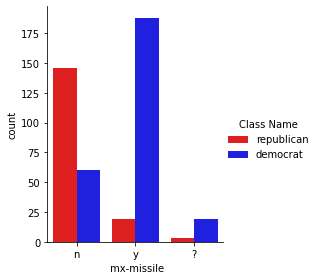

In [34]:
g = sns.catplot(x=' mx-missile', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 10: immigration

#### Totales entre ambos partidos según voto realizado

In [35]:
df_votes[' immigration'].value_counts()

y    216
n    212
?      7
Name:  immigration, dtype: int64

#### Porcentaje de votos según partido

In [36]:
immigration = pd.concat([100*(df_votes.groupby(' immigration')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' immigration')['Target'].mean().round(2)))], axis = 1)
immigration.columns = ["Democrat", "Republican"]
immigration

,Democrat,Republican
immigration,,
?,57.0,43.0
n,66.0,34.0
y,57.0,43.0


#### Gráfico

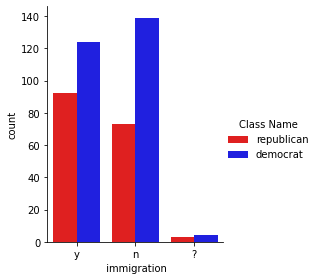

In [37]:
g = sns.catplot(x=' immigration', hue="Class Name", 
                    data=df_votes,  kind= 'count', palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 11: synfuels-corporation-cutback

#### Totales entre ambos partidos según voto realizado

In [38]:
df_votes[' synfuels-corporation-cutback'].value_counts()

n    264
y    150
?     21
Name:  synfuels-corporation-cutback, dtype: int64

#### Porcentaje de votos según partido

In [39]:
synfuels = pd.concat([100*(df_votes.groupby(' synfuels-corporation-cutback')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' synfuels-corporation-cutback')['Target'].mean().round(2)))], axis = 1)
synfuels.columns = ["Democrat", "Republican"]
synfuels

,Democrat,Republican
synfuels-corporation-cutback,,
?,57.0,43.0
n,48.0,52.0
y,86.0,14.0


#### Gráfico

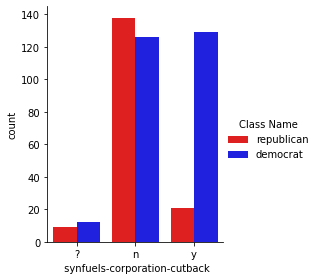

In [40]:
g = sns.catplot(x=' synfuels-corporation-cutback', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 12: education-spending

#### Totales entre ambos partidos según voto realizado

In [41]:
df_votes[' education-spending'].value_counts()

n    233
y    171
?     31
Name:  education-spending, dtype: int64

#### Porcentaje de votos según partido

In [42]:
education = pd.concat([100*(df_votes.groupby(' education-spending')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' education-spending')['Target'].mean().round(2)))], axis = 1)
education.columns = ["Democrat", "Republican"]
education

,Democrat,Republican
education-spending,,
?,58.0,42.0
n,91.0,9.0
y,21.0,79.0


#### Gráfico

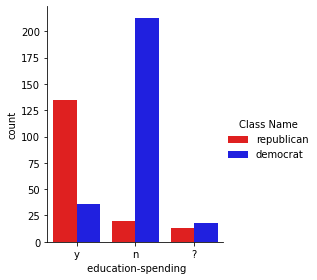

In [43]:
g = sns.catplot(x=' education-spending', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 13: superfund-right-to-sue

#### Totales entre ambos partidos según voto realizado

In [44]:
df_votes[' superfund-right-to-sue'].value_counts()

y    209
n    201
?     25
Name:  superfund-right-to-sue, dtype: int64

#### Porcentaje de votos según partido

In [45]:
superfund = pd.concat([100*(df_votes.groupby(' superfund-right-to-sue')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' superfund-right-to-sue')['Target'].mean().round(2)))], axis = 1)
superfund.columns = ["Democrat", "Republican"]
superfund

,Democrat,Republican
superfund-right-to-sue,,
?,60.0,40.0
n,89.0,11.0
y,35.0,65.0


#### Gráfico

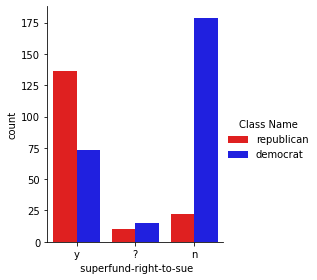

In [46]:
g = sns.catplot(x=' superfund-right-to-sue', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 14: crime

#### Totales entre ambos partidos según voto realizado

In [47]:
df_votes[' crime'].value_counts()

y    248
n    170
?     17
Name:  crime, dtype: int64

#### Porcentaje de votos según partido

In [48]:
crime = pd.concat([100*(df_votes.groupby(' crime')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' crime')['Target'].mean().round(2)))], axis = 1)
crime.columns = ["Democrat", "Republican"]
crime

,Democrat,Republican
crime,,
?,59.0,41.0
n,98.0,2.0
y,36.0,64.0


#### Gráfico

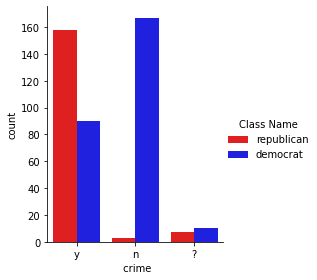

In [49]:
g = sns.catplot(x=' crime', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 15: duty-free-exports

#### Totales entre ambos partidos según voto realizado

In [50]:
df_votes[' duty-free-exports'].value_counts()

n    233
y    174
?     28
Name:  duty-free-exports, dtype: int64

#### Porcentaje de votos según partido

In [51]:
dutyfree = pd.concat([100*(df_votes.groupby(' duty-free-exports')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' duty-free-exports')['Target'].mean().round(2)))], axis = 1)
dutyfree.columns = ["Democrat", "Republican"]
dutyfree

,Democrat,Republican
duty-free-exports,,
?,57.0,43.0
n,39.0,61.0
y,92.0,8.0


#### Gráfico

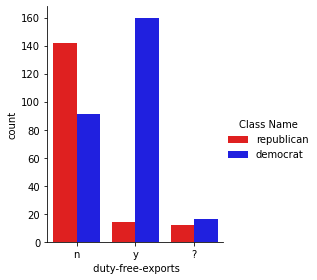

In [52]:
g = sns.catplot(x=' duty-free-exports', hue="Class Name", 
                    data=df_votes, kind="count", palette=color_partidos,
                    height=4, aspect=.8);

## Ley N° 16: export-administration-act-south-africa

#### Totales entre ambos partidos según voto realizado

In [53]:
df_votes[' export-administration-act-south-africa'].value_counts()

y    269
?    104
n     62
Name:  export-administration-act-south-africa, dtype: int64

#### Porcentaje de votos según partido

In [54]:
export = pd.concat([100*(df_votes.groupby(' export-administration-act-south-africa')['Target'].mean().round(2)), 100* (1 - (df_votes.groupby(' export-administration-act-south-africa')['Target'].mean().round(2)))], axis = 1)
export.columns = ["Democrat", "Republican"]
export

,Democrat,Republican
export-administration-act-south-africa,,
?,79.0,21.0
n,19.0,81.0
y,64.0,36.0


#### Gráfico

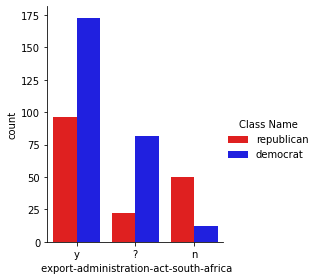

In [55]:
g = sns.catplot(x=' export-administration-act-south-africa', hue="Class Name", 
                    data=df_votes, kind="count", color= 'blue', palette= color_partidos,
                    height=4, aspect=.8);

# 3) Exportación

Se prepara la base de datos antes de ser exportada para aplicar modelos en otra notebook. Ya la variable target tiene su columna numérica homónima. Ahora se procede a reemplazar los valores string de los votos por otros numéricos (n = -1, ? = 0,  y =  1)

In [56]:
votos_replace = df_votes.replace(to_replace = ["n", "?", "y"], value = [-1, 0, 1])
votos_replace.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Target
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1,0
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1,1
5,democrat,-1,1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1,1
6,democrat,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,0,1,1,1,1
7,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,0,1,0
8,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,0
9,democrat,1,1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,0,0,1


Se exporta la base de datos

In [57]:
votos_replace.to_csv('votos_final.csv', index = False)